In [3]:
import sys
# Insert the path of modules folder
sys.path.insert(0, "Package")
  
# Import the module0 directly since
# the current path is of modules.
import Scripts_Analyse01 as pk
import Scripts_AnalyseMulti01 as pk_multi
import Scripts_AnalyseMulti02_Unsupervised as pk_multi_unsp
import Scripts_AnalyseMulti02_Supervised as pk_multi_sup

In [4]:
import random
import os
# notre package de fonctionnalités
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
from IPython.core.display import display, HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from umap import UMAP
from scipy.stats import pearsonr
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from yellowbrick.features import ParallelCoordinates
from plotly.graph_objects import Layout
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.features import PCA as PCA_yellow
from yellowbrick.style import set_palette
from sklearn import metrics
from gensim.models.ldamodel import LdaModel
from  sklearn.feature_extraction.text  import CountVectorizer 
from sklearn.decomposition import SparsePCA
import gensim.downloader as api
import gc
import time
from contextlib import contextmanager
from sklearn import cluster
import warnings
from dotenv import load_dotenv
#from emot.emo_unicode import EMOTICONS_EMO# For EMOTICONS
from spacy.tokens import Token
import re
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from wordcloud import WordCloud
from unidecode import unidecode
from sklearn import metrics
from sklearn import manifold, decomposition
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from nltk.stem.snowball import SnowballStemmer
from spacy.language import Language
import spacy
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK, Trials
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from functools import partial
from gensim.models import FastText  
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
import tensorflow as tf
#Load Packages
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Bidirectional
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Embedding
import mlflow
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import joblib




/tmp/ipykernel_26499/3867817780.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
from tqdm import tqdm,notebook
notebook.tqdm().pandas()

0it [00:00, ?it/s]

In [6]:
load_dotenv()

True

In [ ]:
df = pd.read_csv('input/base.csv', encoding='latin-1', header=None)
df = df.drop([3], axis=1)
df.columns = ["target", "identity", "date", "username", "tweet"]
df.head(2)

In [ ]:
def data_sample(n):
    part1 = df.loc[df["target"]==0]
    part1 = part1.sample(n)
    part2 = df.loc[df["target"]==4]
    part2 = part2.sample(n)
    res = pd.concat([part1, part2])
    return res

In [ ]:
df = data_sample(6000)

In [195]:
df = pd.read_csv("sample_6000.csv")

In [196]:
df

,Unnamed: 0,target,identity,date,username,tweet
0,685179,0,2250709633,Sat Jun 20 01:15:45 PDT 2009,deliah_wilson,just ran into the wall. it hurt. and my finger...
1,39987,0,1573669496,Tue Apr 21 02:16:36 PDT 2009,sum1else,@Jayisgames Maybe all the people with new idea...
2,213040,0,1974898589,Sat May 30 14:02:22 PDT 2009,esv123,Kind of I cant wait for summer so I can go to...
3,697040,0,2253704737,Sat Jun 20 08:36:36 PDT 2009,DalKhera,@bowwow614 it doesn't let me watch it off my i...
4,655140,0,2239775274,Fri Jun 19 08:57:10 PDT 2009,LostCandy,@ah__na Mine begins at 7 am and ends at 12 or ...
...,...,...,...,...,...,...
15995,1378561,4,2052026366,Fri Jun 05 23:26:48 PDT 2009,elayskie,waiting for someone to confirm if he's leaving...
15996,1598172,4,2193106762,Tue Jun 16 08:00:23 PDT 2009,8RKS8,"@sweetemmaxxx yeah, pretty much. Its a video c..."
15997,1083151,4,1968821245,Fri May 29 22:17:57 PDT 2009,mrnewyork2008,Relaxing at home tonight. Pretty sad how frien...
15998,968495,4,1827869439,Sun May 17 11:37:02 PDT 2009,GNRAnni,Pizza and a cold Bear


In [197]:
del df["Unnamed: 0"]

In [198]:
sum(df.duplicated())

0

In [199]:
gc.collect()

2875

In [200]:
nlp=spacy.load("en_core_web_sm")
_ = nlp.add_pipe("emoji", first=True)

In [201]:
def is_emoticons_function(token):
    if token.like_url==True:
        return False
    else:
        check = pk.convert_emoticons(token.text)
    if check != token.text:
        return True

In [202]:
Token.set_extension("is_emoticons", getter=is_emoticons_function, force=True)


In [203]:
import spacy
stopwords = nlp.Defaults.stop_words
nlp.Defaults.stop_words.add("re")

In [204]:
nlp.Defaults.stop_words -= {"not", "no", "n't",'n’t', "would", "without", "could", "still", "ever", 
                            "yet", "almost", "should", "always", "too", "sometimes", "except", 
                            "everything", "really", "nothing", "down", "also", "very", "most", "'d", 
                            "serious", "than", "however", "well", "neither", "anyhow", "few",
                            "rather", "mostly", "none", "must", "less", "many", "as", "often", 
                            "never", "enough", "much", "out", "but", "whereas", "netherrless",
                            "next", "even", "although", "why", "again", "perhaps", "cannot"}

In [205]:
stopwords=nlp.Defaults.stop_words

In [206]:
# Définit l'extension sur le Token avec une valeur par défaut
#Token.set_extension("is_mention", default=False)

def is_mention_function(token):
    if token.text.startswith("@") == True and len(token.text)>1:
        return True
        
Token.set_extension("is_mention", getter=is_mention_function, force=True)

In [207]:
# Définit un composant personnalisé
def text_clean_function(doc):
    new_words = []
    for token in doc:
        if token._.is_emoji:
            new_words.append(token._.emoji_desc)
        elif token._.is_emoticons:
            new_words.append(pk.convert_emoticons(token.text))
        elif token.like_email or token.is_stop or token.like_url:
            continue
        elif token._.is_mention == True:
            continue
        elif token.is_punct or "<" in token.text or ">" in token.text:
            continue
        else :
            if token.text.strip() != "":
                new_words.append(token.text)
    return new_words


In [208]:
from spacy.tokens import Doc

@Language.component("pre_process_text")
def pre_process_text_function(doc):
    # Generate a new list of tokens here
    new_words = text_clean_function(doc)
    new_doc = Doc(doc.vocab, words=new_words)
    return new_doc

In [209]:
# Ajoute le composant en premier dans le pipeline
nlp.add_pipe("pre_process_text", before="tok2vec")

<function __main__.pre_process_text_function(doc)>

In [210]:
df["tweet_clean"] = df["tweet"].progress_apply(lambda x: nlp(x))

  0%|          | 0/16000 [00:00<?, ?it/s]

In [211]:
df["tweet_lemma"] = df["tweet"].progress_apply(lambda x: [token.lemma_ for token in nlp(x)])

  0%|          | 0/16000 [00:00<?, ?it/s]

In [212]:
df["tweet_lemma_join"] = df["tweet_lemma"].progress_apply(lambda x: " ".join(x))

  0%|          | 0/16000 [00:00<?, ?it/s]

Pour que la target soit plus parlante, on va mettre 1 = positif et 0 = négatif

In [213]:
df['target'] = (df['target'] == 4).astype(int)

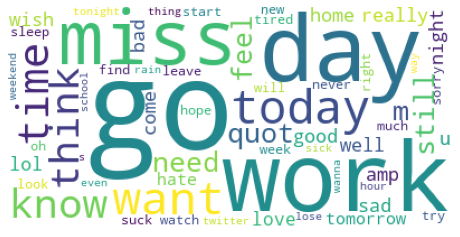

In [214]:
pk.wordcloud_plot(df.loc[df["target"]==0]["tweet_lemma_join"])

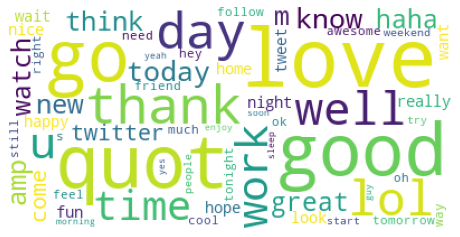

In [215]:
pk.wordcloud_plot(df.loc[df["target"]==1]["tweet_lemma_join"])

## Feature engineering

Glove

In [292]:
import numpy as np


class Embeddings():
    """
    A class to read the word embedding file and to create the word embedding matrix
    """

    def __init__(self, path, vector_dimension):
        self.path = path 
        self.vector_dimension = vector_dimension
    
    @staticmethod
    def get_coefs(word, *arr): 
        return word, np.asarray(arr, dtype='float32')

    def get_embedding_index(self):
        embeddings_index = dict(self.get_coefs(*o.split(" ")) for o in open(self.path, errors='ignore'))
        return embeddings_index

    def create_embedding_matrix(self, tokenizer, max_features):
        """
        A method to create the embedding matrix
        """
        model_embed = self.get_embedding_index()

        embedding_matrix = np.zeros((max_features + 1, self.vector_dimension))
        for word, index in tokenizer.word_index.items():
            if index > max_features:
                break
            else:
                try:
                    embedding_matrix[index] = model_embed[word]
                except:
                    continue
        return embedding_matrix

In [324]:
df["target"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
15995    False
15996    False
15997    False
15998    False
15999    False
Name: target, Length: 16000, dtype: bool

In [334]:
def ml_pipeline_divide_data(df):
    data=df.copy()
    data2=data.copy()  
    X=data2["tweet_lemma_join"].loc[data["target"].isnull()==False]
    del data2["target"]
    Y=data["target"].loc[data["target"].isnull()==False]
    return np.array(X),Y

In [332]:
X_train = df["tweet_lemma_join"]# Texte 

In [335]:
X_train, Y_train = ml_pipeline_divide_data(df)


In [336]:
X_train

array(['run wall hurt finger miss skin',
       'maybe people new idea not time resource',
       'kind not wait summer Cape Cod summer but miss Katie plante rayrachel much',
       ...,
       'relax home tonight Pretty sad friend use but go to head good niight',
       'pizza cold Bear',
       "s absolutely amazing!you're dark horse!A lady many talents!excellent"],
      dtype=object)

In [338]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [319]:
embed_path = 'glove.6B.300d.txt' #glove.6B.300d
embed_dim = 300

In [339]:
len(tokenizer.word_counts)

16452

In [321]:
# Creating the embedding matrix
embedding = Embeddings(embed_path, embed_dim)
embedding_matrix_glove = embedding.create_embedding_matrix(tokenizer, len(tokenizer.word_counts))

In [322]:
embedding_matrix_glove

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0083903 ,  0.28769001, -0.23466   , ..., -0.66409999,
         0.10303   ,  0.1219    ],
       [-0.0093601 ,  0.22789   , -0.10275   , ..., -0.51568002,
        -0.035701  ,  0.0074737 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.18291999,  0.66408002, -0.12192   , ..., -0.39861   ,
        -0.15558   , -0.52869999]])

In [340]:
embedding_matrix_glove.shape

(16453, 300)

### Fasttext

In [341]:
fasttext = api.load("fasttext-wiki-news-subwords-300")
embedding_dim = 300

In [342]:
gc.collect()

35

In [343]:
class Embeddings_Model():
    """
    A class to read the word embedding model and to create the word embedding matrix
    """

    def __init__(self, model, vector_dimension):
        self.model = model 
        self.vector_dimension = vector_dimension

    def get_embedding_index(self):
        embeddings_index = self.model
        return embeddings_index

    def create_embedding_matrix(self, tokenizer, max_features):
        """
        A method to create the embedding matrix
        """
        model_embed = self.get_embedding_index()

        embedding_matrix = np.zeros((max_features + 1, self.vector_dimension))
        for word, index in tokenizer.word_index.items():
            if index > max_features:
                break
            else:
                try:
                    embedding_matrix[index] = model_embed[word]
                except:
                    continue
        return embedding_matrix

In [344]:
# Creating the embedding matrix
embedding = Embeddings_Model(fasttext, embedding_dim)
embedding_matrix_fasttext = embedding.create_embedding_matrix(tokenizer, len(tokenizer.word_counts))

In [371]:
N_total = embedding_matrix_fasttext.shape[0]

In [372]:
N_total

16453

In [347]:
embedding_matrix_fasttext.shape

(16453, 300)

## Recherche d'un modèle avancé

In [348]:
def ml_pipeline_divide_data(df):
    data=df.copy()
    data2=data.copy()  
    X=data2["tweet_lemma_join"].loc[pd.isna(data["target"])==False]
    del data2["target"]
    Y=data["target"].loc[pd.isna(data["target"])==False]
    return X,Y

from keras_preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences

class TextToTensor():

    def __init__(self, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.max_len = max_len

    def string_to_tensor(self, string_list: list) -> list:
        """
        A method to convert a string list to a tensor for a deep learning model
        """    
        string_list = self.tokenizer.texts_to_sequences(string_list)
        string_list = pad_sequences(string_list, maxlen=self.max_len)
        
        return string_list

def ml_step1_ech(df):
        X, Y = ml_pipeline_divide_data(df)
        X_train, X_test, y_train, y_test = pk_multi_sup.pipelineModel_TrainingSet(X, Y, 0, 0.3)
        return X_train, X_test, y_train, y_test

def ml_step2_ech(X_train, X_test, y_train, y_test):
    max_len = np.max([len(text) for text in X_train])
    TextToTensor_instance = TextToTensor(
            tokenizer=tokenizer,
            max_len=max_len
            )
    X_train = TextToTensor_instance.string_to_tensor(X_train)
    # Creating the padded input for the deep learning model
    # X_train = ml_transform(X_train)
    X_test = TextToTensor_instance.string_to_tensor(X_test)
    # X_test = TextToTensor_instance.string_to_tensor(X_test)
    return X_train, X_test, np.array(y_train), np.array(y_test)
    
def ml_ech(df):
    X_train, X_test, y_train, y_test = ml_step1_ech(df)
    X_train, X_test, y_train, y_test = ml_step2_ech(X_train, X_test, y_train, y_test)
    return X_train, X_test, y_train, y_test


In [349]:
X_train, X_test, y_train, y_test = ml_ech(df)

In [350]:
X_train_ech, X_test_ech, y_train_ech, y_test_ech = pk_multi_sup.pipelineModel_TrainingSet(X_train, y_train, 0, 0.3)

In [351]:
def graph_history_train(history):
    loss_curve = history.history["loss"]
    acc_curve = history.history["auc"]

    loss_val_curve = history.history["val_loss"]
    acc_val_curve = history.history["val_auc"]

    plt.plot(loss_curve, label="Train")
    plt.plot(loss_val_curve, label="Val")
    plt.legend(loc='upper left')
    plt.title("Loss")
    plt.show()

    plt.plot(acc_curve, label="Train")
    plt.plot(acc_val_curve, label="Val")
    plt.legend(loc='upper left')
    plt.title("AUC")
    plt.show()

In [352]:
####score pour fonction metier
from sklearn import metrics

def fmetric_metier(y_true, y_pred):
    CM = metrics.confusion_matrix(y_true, y_pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    metier = (FN*0.9+FP*0.1)/(FN+FP+TN+TP)
    
    print('FULL Métrique Métier : ', metier)
    return metier

metric_history = []
best_metric_history_n = []

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe Roc')
    plt.legend()
    plt.show()


def pipeline_training_metrics(preds, y_test):
    # On créé un vecteur de prédiction à partir du vecteur de probabilités
    y_pred = np.where(preds > 0.5, 1, 0) 
    #y_pred = preds.argmax(axis=1)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    print(roc_auc)
    #print("false positive rate : ", false_positive_rate)
    #print("true positive rate : ", true_positive_rate)
    x_rate = false_positive_rate
    y_rate = true_positive_rate 

    # This is the ROC curve
    plot_roc_curve(x_rate,y_rate)
    
    CM = metrics.confusion_matrix(y_test, y_pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    metier = (FN*0.9+FP*0.1)/(FN+FP+TN+TP)
    
    print('FULL Métrique Métier : ', metier)

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    #Matrice de confusion
    conf = metrics.confusion_matrix(y_test, y_pred)
    conf
    sns.heatmap(conf, square=True, annot=True, cbar=False)
            #, xticklabels=list(iris.target_names)
            #, yticklabels=list(iris.target_names))
    plt.xlabel('valeurs prédites')
    plt.ylabel('valeurs réelles')
    plt.title('Matrice de confusion %')
    plt.show()
    
    sns.heatmap(conf/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues')
    plt.xlabel('valeurs prédites')
    plt.ylabel('valeurs réelles')
    plt.title('Matrice de confusion %')
    plt.show()
    
    print("\nSur le jeu de test auc : {:.3f}".format(metrics.roc_auc_score(y_test, y_pred)))
    print("\nSur le jeu de test f1_score : {:.3f}".format(metrics.f1_score(y_test, y_pred)))
    print("\nSur le jeu de test precision : {:.3f}".format(metrics.precision_score(y_test, y_pred)))
    print("\nSur le jeu de test recall : {:.3f}".format(metrics.recall_score(y_test, y_pred)))
    #


Pipeline pour tester différentes méthodes

In [353]:
from keras_tuner import HyperModel, tuners, Objective
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import pickle

In [354]:
X_train

array([[    0,     0,     0, ...,   412,  2342,  2081],
       [    0,     0,     0, ...,     5,     2,     8],
       [    0,     0,     0, ...,     0,   869, 12929],
       ...,
       [    0,     0,     0, ...,    30,     1,     8],
       [    0,     0,     0, ...,     0,     5,    51],
       [    0,     0,     0, ...,     7,    15,   612]], dtype=int32)

In [355]:
#prepare data bert
pickle_inp_path='bert_inp.pkl'
pickle_mask_path='bert_mask.pkl'
pickle_label_path='bert_label.pkl'

def prepare_data_bert():
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    sentences=df['tweet_lemma_join']
    labels=df["target"]
    input_ids=[]
    attention_masks=[]

    for sent in sentences:
        bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
        input_ids.append(bert_inp['input_ids'])
        attention_masks.append(bert_inp['attention_mask'])

    input_ids=np.asarray(input_ids)
    attention_masks=np.array(attention_masks)
    labels=np.array(labels)
    pickle.dump((input_ids),open(pickle_inp_path,'wb'))
    pickle.dump((attention_masks),open(pickle_mask_path,'wb'))
    pickle.dump((labels),open(pickle_label_path,'wb'))
    input_ids=pickle.load(open(pickle_inp_path, 'rb'))
    attention_masks=pickle.load(open(pickle_mask_path, 'rb'))
    labels=pickle.load(open(pickle_label_path, 'rb'))
    return input_ids, attention_masks, labels

In [356]:
input_ids, attention_masks, labels = prepare_data_bert()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [357]:
input_ids.shape, attention_masks.shape, labels.shape

((16000, 64), (16000, 64), (16000,))

In [358]:
import os
import re
import json
import string
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer, TFBertModel, BertConfig

max_len = 64
configuration = BertConfig()  # default parameters and configuration for BERT

In [359]:
input_ids, attention_masks, labels = prepare_data_bert()
train_inp,val_inp,train_label,val_label,train_mask,val_mask=pk_multi.train_test_split(input_ids,labels,attention_masks,test_size=0.3)
        # Performs the hyperparameter tuning

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [360]:
train_inp.shape, train_label.shape, train_mask.shape

((11200, 64), (11200,), (11200, 64))

In [ ]:
def create_model():
    ## BERT encoder
    encoder = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

    ## QA Model
    input_ids = layers.Input(shape=(max_len,), dtype=tf.int32)
    #token_type_ids = layers.Input(shape=(max_len,), dtype=tf.int32)
    attention_mask = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding = encoder(
        input_ids,  attention_mask=attention_mask
    )[0]
#token_type_ids=token_type_ids,

    start_logits = layers.Dense(units=hp.Int(
                        'units',
                        min_value=32,
                        max_value=512,
                        step=32,
                        default=32
                    ),
                    activation=hp.Choice(
                        'dense_activation',
                        values=['relu', 'tanh', 'sigmoid'],
                        default='tanh'
                    ))(embedding)
    # start_logits = layers.Flatten()(start_logits)
    start_logi = layers.Flatten()(start_logits)
    # end_logits = layers.Dense(1, name="end_logit", use_bias=False)(embedding)
    # end_logits = layers.Flatten()(end_logits)

    start_probs = layers.Dense(1, keras.activations.sigmoid)(start_logi)
    # end_probs = layers.Activation(keras.activations.softmax)(end_logits)
    #end_logits = layers.Flatten()(start_probs)
    model = keras.Model(
        inputs=[input_ids, attention_mask],
        outputs=start_probs
    )
    #loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    #optimizer = keras.optimizers.Adam(lr=5e-5)
    #model.compile(optimizer=optimizer, loss=[loss, loss])
    return model

In [362]:
m = create_model()

In [363]:
class BertHyperModel(HyperModel):
    def __init__(self, num_classes, type_model):
        self.num_classes = num_classes
        self.type_model = type_model
    
    def build(self, hp):
        gc.collect()
        type_model =self.type_model
        # model simple + bilstm
        model = create_model()
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    default=1e-3
                )
            ),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['AUC']
        )
        #model.summary()
        return model

#hypermodel = RNNHyperModel(num_classes=2)

In [364]:
class RNNHyperModel(HyperModel):
    def __init__(self, num_classes, type_model, bilstm, dense2):
        self.num_classes = num_classes
        self.type_model = type_model
        self.bilstm = bilstm
        self.dense2 = dense2
    
    def build(self, hp):
        gc.collect()
        type_model = self.type_model
        bilstm = self.bilstm
        dense2 = self.dense2
        model = tf.keras.Sequential()
        if "_embed" in type_model:
            if hp.Choice('embedding_choice_1', ['glove', 'fasttext']) == 'fasttext':
                print("---------------fasttext")
                model.add(
                    Embedding( 
                                input_dim=N_total, 
                                output_dim=300, 
                                input_length=202, 
                                weights=[embedding_matrix_fasttext],
                                trainable = False,
                                mask_zero= True)
                        )
            else:
                print("---------------glove")
                model.add(
                    Embedding( 
                                input_dim=N_total, 
                                output_dim=300, 
                                input_length=202, 
                                weights= [embedding_matrix_glove],
                                trainable = False,
                                mask_zero= True)
                        )
        else:
            print("---------------sans embed")
            model.add(
                Embedding( 
                            input_dim=N_total, 
                            output_dim=300, 
                            input_length=202, 
                            trainable = True,
                            mask_zero= True)
                    )
        ##BILSTM
        if bilstm == 1:
            print("---------------bilstl")
            model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))

            if hp.Choice("dropout_0", ["1", "2"]) == 2:
                Dropout(rate=hp.Float(
                        'dropout_0',
                        min_value=0.0,
                        max_value=0.5,
                        default=0.2,
                        step=0.05,
                    ))
            if hp.Choice("bilstm_1", ["bilstm", "ssbilstm"]) == "bilstm":
                model.add(Bidirectional(LSTM(32)))
        else:
            print("---------------sans bilstm")
        model.add(
                Dense(
                    units=hp.Int(
                        'units',
                        min_value=32,
                        max_value=512,
                        step=32,
                        default=32
                    ),
                    activation=hp.Choice(
                        'dense_activation',
                        values=['relu', 'tanh', 'sigmoid'],
                        default='tanh'
                    )
                )
            )
        model.add(
                Dropout(rate=hp.Float(
                    'dropout_1',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.2,
                    step=0.05,
                ))
            )
        model.add(Flatten())
        if dense2 == 1:
            print("--------add couche dense 2-----------")
            model.add(
                Dense(
                    units=hp.Int(
                        'units',
                        min_value=32,
                        max_value=512,
                        step=32,
                        default=128
                    ),
                    activation=hp.Choice(
                        'dense_activation',
                        values=['relu', 'tanh', 'sigmoid'],
                        default='tanh'
                    )
                )
            )
            model.add(
                Dropout(
                    rate=hp.Float(
                        'dropout_2',
                        min_value=0.0,
                        max_value=0.5,
                        default=0.2,
                        step=0.05
                    )
                )
            )
            
        model.add(Dense(1, activation='sigmoid'))
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    default=1e-3
                )
            ),
            loss='binary_crossentropy',
            metrics=['AUC']
        )

        #model.summary()
        return model

#hypermodel = RNNHyperModel(num_classes=2)

In [365]:
gc.collect()

34191

In [366]:
gc.collect()

21

In [374]:
from keras_tuner import oracles
from pathlib import Path
from loguru import logger
from sklearn import model_selection

SEED = 1
NUM_CLASSES = 1
#INPUT_SHAPE = (32, 32, 3)

N_EPOCH_SEARCH = 10
HYPERBAND_MAX_EPOCHS = 10
MAX_TRIALS = 5
EXECUTION_PER_TRIAL = 5
BAYESIAN_NUM_INITIAL_POINTS = 2

def run_hyperparameter_tuning(x_test, x_train, y_test, y_train, type_model):
    if type_model=="simple_embed":
        hypermodel = RNNHyperModel(num_classes=NUM_CLASSES, type_model=type_model, bilstm=0, dense2=0)
        output_dir = Path("./output/")
        tuners = define_tuners(
            hypermodel, directory=output_dir, project_name="embed_tuning"
        )
        print("---------type hypermodel :------", type_model)
        results = []
        for tuner in tuners:
            
            type_info, elapsed_time, loss, auc = rnn_tuner_evaluation(
                tuner, x_test, x_train, y_test, y_train, type_model
            )
            logger.info(
                f"Elapsed time = {elapsed_time:10.4f} s, auc = {auc}, loss = {loss}"
            )
            results.append([type_info, elapsed_time, loss, auc])
        logger.info(results)
        print(results)
        return results
    elif type_model=="simple_ssembed":
        hypermodel = RNNHyperModel(num_classes=NUM_CLASSES, type_model=type_model, bilstm=0, dense2=0)
        output_dir = Path("./output/")
        tuners = define_tuners(
            hypermodel, directory=output_dir, project_name="ssembed_tuning"
        )
        print("---------type hypermodel :------", type_model)
        results = []
        for tuner in tuners:
            
            type_info, elapsed_time, loss, auc = rnn_tuner_evaluation(
                tuner, x_test, x_train, y_test, y_train, type_model
            )
            logger.info(
                f"Elapsed time = {elapsed_time:10.4f} s, auc = {auc}, loss = {loss}"
            )
            results.append([type_info, elapsed_time, loss, auc])
        logger.info(results)
        print(results)
        return results
    elif type_model=="simple_ssembed_dense2":
        hypermodel = RNNHyperModel(num_classes=NUM_CLASSES, type_model=type_model, bilstm=0, dense2=1)
        output_dir = Path("./output/")
        tuners = define_tuners(
            hypermodel, directory=output_dir, project_name="ssembed_dense2_tuning"
        )
        print("---------type hypermodel :------", type_model)
        results = []
        for tuner in tuners:
            
            type_info, elapsed_time, loss, auc = rnn_tuner_evaluation(
                tuner, x_test, x_train, y_test, y_train, type_model
            )
            logger.info(
                f"Elapsed time = {elapsed_time:10.4f} s, auc = {auc}, loss = {loss}"
            )
            results.append([type_info, elapsed_time, loss, auc])
        logger.info(results)
        print(results)
        return results
    elif type_model=="bilstm_embed":
        hypermodel = RNNHyperModel(num_classes=NUM_CLASSES, type_model=type_model, bilstm=1, dense2=0)
        output_dir = Path("./output/")
        tuners = define_tuners(
            hypermodel, directory=output_dir, project_name="bilstm_embed_tuning"
        )
        print("---------type hypermodel :------", type_model)
        results = []
        for tuner in tuners:
            
            type_info, elapsed_time, loss, auc = rnn_tuner_evaluation(
                tuner, x_test, x_train, y_test, y_train, type_model
            )
            logger.info(
                f"Elapsed time = {elapsed_time:10.4f} s, auc = {auc}, loss = {loss}"
            )
            results.append([type_info, elapsed_time, loss, auc])
        logger.info(results)
        print(results)
        return results
    elif type_model=="bilstm_ssembed":
        hypermodel = RNNHyperModel(num_classes=NUM_CLASSES, type_model=type_model, bilstm=1, dense2=0)
        output_dir = Path("./output/")
        tuners = define_tuners(
            hypermodel, directory=output_dir, project_name="bilstm_embed_tuning"
        )
        print("---------type hypermodel :------", type_model)
        results = []
        for tuner in tuners:
            
            type_info, elapsed_time, loss, auc = rnn_tuner_evaluation(
                tuner, x_test, x_train, y_test, y_train, type_model
            )
            logger.info(
                f"Elapsed time = {elapsed_time:10.4f} s, auc = {auc}, loss = {loss}"
            )
            results.append([type_info, elapsed_time, loss, auc])
        logger.info(results)
        print(results)
        return results
    elif type_model=="bilstm_ssembed_dense2":
        hypermodel = RNNHyperModel(num_classes=NUM_CLASSES, type_model=type_model, bilstm=1, dense2=1)
        output_dir = Path("./output/")
        tuners = define_tuners(
            hypermodel, directory=output_dir, project_name="bilstm_ssembed_tuning"
        )
        print("---------type hypermodel :------", type_model)
        results = []
        for tuner in tuners:
            
            type_info, elapsed_time, loss, auc = rnn_tuner_evaluation(
                tuner, x_test, x_train, y_test, y_train, type_model
            )
            logger.info(
                f"Elapsed time = {elapsed_time:10.4f} s, auc = {auc}, loss = {loss}"
            )
            results.append([type_info, elapsed_time, loss, auc])
        logger.info(results)
        print(results)
        return results

    elif type_model=="bert":
        hypermodel = BertHyperModel(num_classes=NUM_CLASSES, type_model=type_model)
        output_dir = Path("./output/")
        tuners = define_tuners(
            hypermodel, directory=output_dir, project_name="bert_tuning"
        )
        print("---------type hypermodel :------", type_model)
        results = []
        for tuner in tuners:
            
            type_info, elapsed_time, loss, auc = bert_tuner_evaluation(
                tuner, x_test, x_train, y_test, y_train, type_model
            )
            logger.info(
                f"Elapsed time = {elapsed_time:10.4f} s, auc = {auc}, loss = {loss}"
            )
            results.append([type_info, elapsed_time, loss, auc])
        logger.info(results)
        print(results)
        return results
    else:
        print("error")

log_dir='tensorboard_data/tb_bert'
model_save_path='./output/bert_model.h5'

def bert_tuner_evaluation(tuner, x_test, x_train, y_test, y_train, type_model):
    print("----------------------------evalution----------------------------")
    # Overview of the task
    tuner.search_space_summary()
    
    print("bert------------")
    callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss', mode='min',save_best_only=True),tf.keras.callbacks.TensorBoard(log_dir=log_dir)]
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    input_ids, attention_masks, labels = prepare_data_bert()
    train_inp,test_inp,train_label,test_label,train_mask,test_mask=pk_multi.train_test_split(input_ids,labels,attention_masks,test_size=0.3)
    train_inp,val_inp,train_label,val_label,train_mask,val_mask=pk_multi.train_test_split(train_inp,train_label,train_mask,test_size=0.3)
    # Performs the hyperparameter tuning
    logger.info("Start hyperparameter tuning")
    search_start = time.time()
    tuner.search([train_inp,train_mask],train_label,batch_size=200,epochs=N_EPOCH_SEARCH, validation_data=([val_inp,val_mask], val_label),callbacks=callbacks)
    search_end = time.time()
    elapsed_time = search_end - search_start

    # Show a summary of the search
    tuner.results_summary()

    # Retrieve the best model.
    best_model = tuner.get_best_models(num_models=1)[0]
    input_ids, attention_masks, labels = prepare_data_bert()
    # Evaluate the best model.
    loss, auc = best_model.evaluate([test_inp, test_mask], test_label)
    return "bert", elapsed_time, loss, auc
    
def rnn_tuner_evaluation(tuner, x_test, x_train, y_test, y_train, type_model):
    print("---------simple--------")
    x_train_ech, x_test_ech, y_train_ech, y_test_ech = pk_multi_sup.pipelineModel_TrainingSet(x_train, y_train, 0, 0.3)
    # Performs the hyperparameter tuning
    logger.info("Start hyperparameter tuning")
    search_start = time.time()
    tuner.search(x_train_ech, y_train_ech, batch_size=200, epochs=N_EPOCH_SEARCH, validation_data=(x_test_ech, y_test_ech))

    #tuner.search(x_train_ech, y_train_ech, batch_size=113, epochs=N_EPOCH_SEARCH, validation_data=(x_test_ech, y_test_ech))
    search_end = time.time()
    elapsed_time = search_end - search_start

    # Show a summary of the search
    tuner.results_summary()

    # Retrieve the best model.  
    best_model = tuner.get_best_models(num_models=1)[0]

    # Evaluate the best model.
    loss, auc = best_model.evaluate(x_test, y_test)
    #elapsed_time = time.time()
    elapsed_time = search_end - search_start
    return "simple",  elapsed_time, loss, auc



def define_tuners(hypermodel, directory, project_name):
    
    random_tuner = tuners.RandomSearch(
        hypermodel,
        objective=Objective("auc", direction="max"),
        seed=SEED,
        max_trials=MAX_TRIALS,
        executions_per_trial=EXECUTION_PER_TRIAL,
        directory=f"{directory}_random_search",
        project_name=project_name
    )
    
    hyperband_tuner = tuners.Hyperband(
        hypermodel,
        max_epochs=HYPERBAND_MAX_EPOCHS,
        objective=Objective("auc", direction="max"),
        seed=SEED,
        executions_per_trial=EXECUTION_PER_TRIAL,
        directory=f"{directory}_hyperband",
        project_name=project_name,
    )
    bayesian_tuner = tuners.BayesianOptimization(
        hypermodel,
        objective=Objective("auc", direction="max"),
        seed=SEED,
        num_initial_points=BAYESIAN_NUM_INITIAL_POINTS,
        max_trials=MAX_TRIALS,
        directory=f"{directory}_bayesian",
        project_name=project_name
    )
    """
    tuner = tuners.SklearnTuner(
        oracle=oracles.BayesianOptimizationOracle(
            objective=Objective('score', 'max'),
            max_trials=10),
        hypermodel=hypermodel,
        scoring=metrics.make_scorer(metrics.roc_auc_score),
        cv=model_selection.StratifiedKFold(5),
        directory=f"{directory}_crossval_{int(time.time())}",
        project_name='my_project')"""
    return [random_tuner, hyperband_tuner, bayesian_tuner]
        


In [375]:
results_all = run_hyperparameter_tuning(X_test, X_train, y_test, y_train, "simple_embed")

40/40 [==============================] - 4s 90ms/step - loss: 0.5751 - auc: 0.7915 - val_loss: 0.5802 - val_auc: 0.7802
Trial 5 Complete [00h 00m 36s]
auc: 0.7915407419204712

Best auc So Far: 0.992452085018158
Total elapsed time: 00h 05m 59s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in output_bayesian/embed_tuning
Showing 10 best trials
Trial summary
Hyperparameters:
embedding_choice_1: glove
units: 480
dense_activation: relu
dropout_1: 0.1
learning_rate: 0.00626672677940805
Score: 0.992452085018158
Trial summary
Hyperparameters:
embedding_choice_1: glove
units: 192
dense_activation: relu
dropout_1: 0.25
learning_rate: 0.005756885687430145
Score: 0.983870804309845
Trial summary
Hyperparameters:
embedding_choice_1: glove
units: 512
dense_activation: relu
dropout_1: 0.5
learning_rate: 0.0001
Score: 0.8086717128753662
Trial summary
Hyperparameters:
embedding_choice_1: glove
units: 160
dense_activation: relu
dropout_1: 0.0
learning_rate: 0.0001
Score: 0.791540741920471

In [376]:
results_all_bert = run_hyperparameter_tuning(X_test, X_train, y_test, y_train, "bert")

INFO:tensorflow:Reloading Oracle from existing project output_random_search/bert_tuning/oracle.json
---------type hypermodel :------ bert
----------------------------evalution----------------------------
Search space summary
Default search space size: 1
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': None}
bert------------

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0.0014302         |?                 |learning_rate

Epoch 1/10
40/40 [==============================] - 1173s 29s/step - loss: 0.7027 - auc: 0.5052 - val_loss: 0.6950 - val_auc: 0.5000
Epoch 2/10
40/40 [==============================] - 1135s 28s/step - loss: 0.6965 - auc: 0.4926 - val_loss: 0.6957 - val_auc: 0.5000
Epoch 3/10
40/40 [==============================] - 1144s 29s/step - loss: 0.6948 - auc: 0.4896 - val_loss: 0.6952 - val_auc: 0.5000

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model 